# Visualisasi Data CCTV DPKP3

In [52]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Constants

DINAS = "DPKP3"
ORANGE = "#ff5733"
GREEN = "#4caf50"
BLUE = "#1f77b4"
RED = "#d62728"
PURPLE = "#9467bd"
BROWN = "#8c564b"
PINK = "#e377c2"
GRAY = "#7f7f7f"
OLIVE = "#bcbd22"
CYAN = "#17becf"
DARK_GREEN = "#1b9e77"
LIGHT_BLUE = "#6baed6"

In [54]:
# Load and filter dataset

dataset = pd.read_csv("monitoring_sample.csv")
filter = (dataset["Dinas"] == DINAS)
dpkp3_dataset = dataset[filter]

In [55]:
dpkp3_dataset

,Nama CCTV,Jalan,Kelurahan,Kecamatan,Dinas,Hari,Jam,Jam Obervasi,Anomali,Anomali Kategori,KodeSurveyor,File Video CCTV
0,TAMAN TEGALEGA_12,Jl. Otto Iskandar Dinata,Karanganyar,Astanaanyar,DPKP3,Senin,06:00,06.00-06.10,1. Tanggal & Jam Salah\r\n2. CCTV Tidak Bisa d...,Tidak Berfungsi,140810230006,https://drive.google.com/file/d/1LHqC2XL3gS11R...
5,TAMAN TEGALEGA_02,Jl. Otto Iskandar Dinata,Karanganyar,Astanaanyar,DPKP3,Senin,07:00,07.03-07.13,1. Tanggal & Jam Salah\r\n2. CCTV Tidak Bisa d...,Tidak Berfungsi,140810230006,https://drive.google.com/file/d/1REGDor0s5hqe3...
20,TAMAN TEGALEGA_10,Jl. Otto Iskandar Dinata,Karanganyar,Astanaanyar,DPKP3,Senin,09:00,09:47-09-57,cctv glitch dan tanggal serta jam tidak sesuai,Visual Kurang Jelas,140810230004,TAMAN TEGALEGA_10 2024-05-06 09-48-47.mp4
28,TAMAN TEGALEGA_08,Jl. Otto Iskandar Dinata,Karanganyar,Astanaanyar,DPKP3,Senin,10:00,10:40 - 10:50,tanggal dan jam tidak sesuai,Salah Timestamp,140810230004,TAMAN TEGALEGA_08.mp4
48,TAMAN RADIO_03,Jl. Ir. H. Juanda,Tamansari,Bandung Wetan,DPKP3,Senin,13:00,13.13 - 13.23,cctv buffering,Tidak Berfungsi,140810230005,https://drive.google.com/file/d/1jnlKexmZUZ7sn...
...,...,...,...,...,...,...,...,...,...,...,...,...
758,TAMAN RADIO_03,Jl. Ir. H. Juanda,Tamansari,Bandung Wetan,DPKP3,Selasa,06:00,06:04 - 06:14,CCTV buffering,Tidak Berfungsi,140810230081,TAMAN RADIO_03.mp4
767,TAMAN SKETPARK_01,Jl. BKR nomor 181,Pelindung Hewan,Astanaanyar,DPKP3,Minggu,18:00,18:37 - 18:47,CCTV buffering,Tidak Berfungsi,140810230082,TAMAN SKETPARK_01.mp4
781,CIKAPUNDUNG RIVER_02,Jl. Dr. Ir. Sukarno,Braga,Sumur Bandung,DPKP3,Minggu,20:00,20.06 - 20.16,CCTV buffering,Tidak Berfungsi,140810230084,https://drive.google.com/file/d/1rn2OwdvpaUBP1...
785,TAMAN CEMPAKA_03,Jl. Patra Komala,Merdeka,Sumur Bandung,DPKP3,Minggu,21:00,21.25 - 21.35,CCTV buffering,Tidak Berfungsi,140810230084,https://drive.google.com/file/d/1p8ULqRo0nH8O5...


In [56]:
# Unique anomaly categories
categories = dpkp3_dataset["Anomali Kategori"].unique()
categories

array(['Tidak Berfungsi', 'Visual Kurang Jelas', 'Salah Timestamp',
       'Tidak Beranomali', 'Offline', 'Tidak Berjalan Normal',
       'Terhalang Objek'], dtype=object)

In [57]:
kecamatan = len(dpkp3_dataset["Kecamatan"].unique())
kecamatan

6

In [73]:
dpkp3_dataset.loc[:, 'Kecamatan'] = dpkp3_dataset['Kecamatan'].str.replace('\xa0', ' ')

sumur_bandung_data = dpkp3_dataset[dpkp3_dataset['Kecamatan'] == 'Sumur Bandung']
sumur_bandung_data.head()

,Nama CCTV,Jalan,Kelurahan,Kecamatan,Dinas,Hari,Jam,Jam Obervasi,Anomali,Anomali Kategori,KodeSurveyor,File Video CCTV,Anomali Status
64,TAMAN TONGKENG_01,Jl. Tongkeng,Merdeka,Sumur Bandung,DPKP3,Senin,16:00,16:07-16:17,cctv buffering,Tidak Berfungsi,140810230007,CCTV - 230007,Anomali
92,CIKAPUNDUNG RIVER_02,Jl. Dr. Ir. Sukarno,Braga,Sumur Bandung,DPKP3,Senin,20:00,20:25 - 20:35,cctv offline,Offline,140810230010,https://drive.google.com/file/d/1gKRaz_bFlvMLi...,Anomali
205,TAMAN TONGKENG_01,Jl. Tongkeng,Merdeka,Sumur Bandung,DPKP3,Selasa,20:00,20.33 - 20.43,cctv buffering,Tidak Berfungsi,140810230021,https://drive.google.com/file/d/1FrH7C8iNtr2DM...,Anomali
228,TAMAN TONGKENG_02,Jl. Tongkeng,Merdeka,Sumur Bandung,DPKP3,Rabu,07:00,07.00 - 07.10,Rusak / buffering / hitam,Tidak Berfungsi,140810230023,Taman Tongkeng_02.mp4,Anomali
248,TAMAN CEMPAKA_02,Jl. Patra Komala,Merdeka,Sumur Bandung,DPKP3,Rabu,09:00,09.00 - 09.10,CCTV offline (buffering tidak dapat diakses),Tidak Berfungsi,140810230025,TAMAN CEMPAKA_02.mp4,Anomali


## Status Anomali CCTV Dinas DPKP3
#### Jumlah CCTV Beranomali VS Tidak Beranomali

## Status Anomali CCTV Dinas DPKP3
#### Jumlah CCTV Beranomali VS Tidak Beranomali

In [59]:
# jumlah cctv beranomali dan tidak
jml_tidak_beranomali = dpkp3_dataset[dpkp3_dataset["Anomali Kategori"] == "Tidak Beranomali"].shape[0]
jml_beranomali = dpkp3_dataset["Anomali Kategori"].shape[0] - jml_tidak_beranomali
jml_beranomali

74

In [60]:
# data
sizes = [jml_tidak_beranomali, jml_beranomali]
labels = [f"Tidak Beranomali\n({jml_tidak_beranomali})", f"Beranomali\n({jml_beranomali})"]
colors = [LIGHT_BLUE, ORANGE]

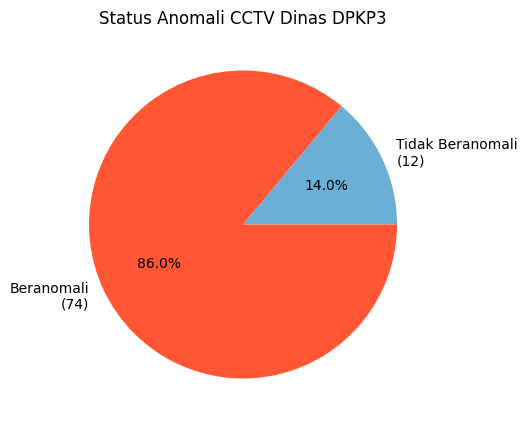

In [61]:
# pie plotting
plt.figure(figsize=(5, 5))
plt.title("Status Anomali CCTV Dinas DPKP3")
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.show()

## Status CCTV dan Kondisinya
#### Jumlah CCTV per kategori kondisi

In [62]:
def get_rows(col: str, category: str) -> int:
    return dpkp3_dataset[dpkp3_dataset[col] == category].shape[0]

In [63]:
# jumlah tiap kategori
jml_tidak_berfungsi = get_rows("Anomali Kategori", "Tidak Berfungsi")
jml_visual_kurang_jelas = get_rows("Anomali Kategori", "Visual Kurang Jelas")
jml_salah_timestamp = get_rows("Anomali Kategori", "Salah Timestamp")
jml_offline = get_rows("Anomali Kategori", "Offline")
jml_tidak_berjalan_normal = get_rows("Anomali Kategori", "Tidak Berjalan Normal")
jml_terhalang_objek = get_rows("Anomali Kategori", "Terhalang Objek")


In [64]:
# data
sizes = [jml_tidak_beranomali, jml_tidak_berfungsi, jml_visual_kurang_jelas, jml_salah_timestamp, jml_offline, jml_tidak_berjalan_normal, jml_terhalang_objek]
labels = ["Tidak Beranomali", "Tidak Berfungsi", "Visual Kurang Jelas", "Salah Timestamp", "Offline", "Tidak Berjalan Normal", "Terhalang Objek"]
colors = [BLUE, OLIVE, RED, PURPLE, BROWN, PINK, CYAN]

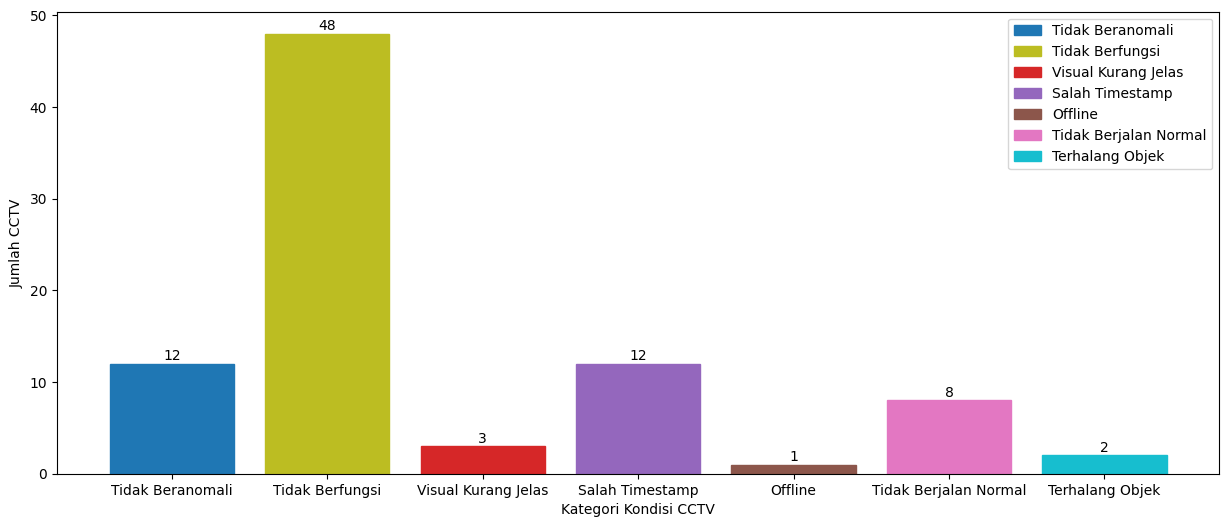

In [69]:
# bar plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, sizes)

for bar, color in zip(bars, colors):
    bar.set_color(color)

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             str(size),
             ha="center",
             va="bottom")

plt.legend(bars, labels, loc="upper right")
plt.ylabel("Jumlah CCTV")
plt.xlabel("Kategori Kondisi CCTV")
plt.show()

## Distribusi Geografis CCTV
#### Render peta sebaran lokasi CCTV beserta kondisinya

In [72]:
dpkp3_dataset.loc[:, 'Anomali Status'] = dpkp3_dataset['Anomali Kategori'].apply(lambda x: 'Anomali' if x != 'Tidak Beranomali' else 'Tidak Beranomali')

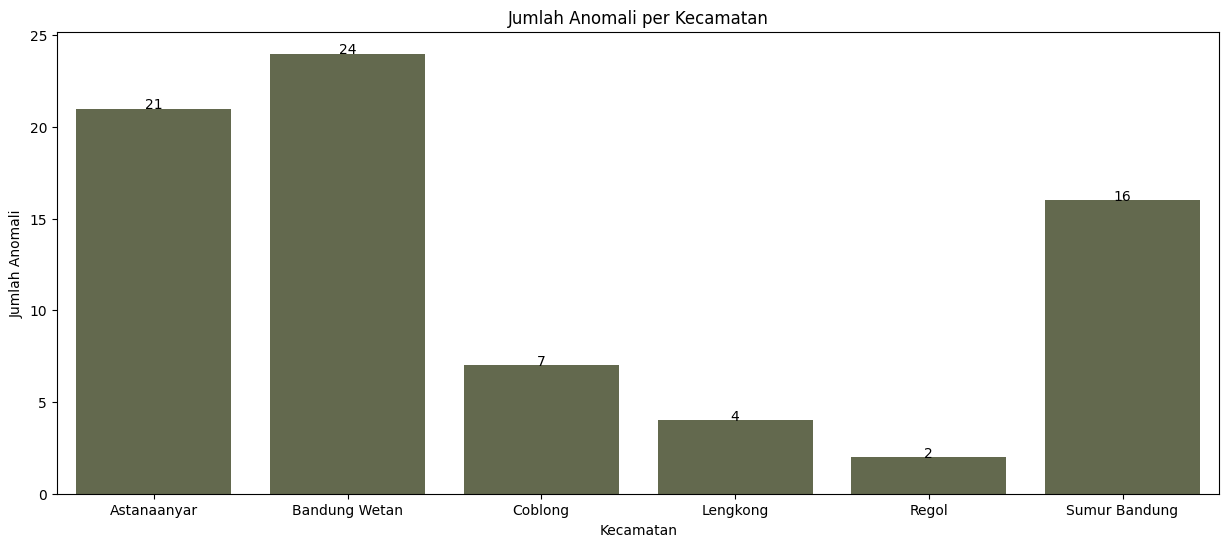

In [99]:
total_counts = dpkp3_dataset.groupby('Kecamatan').size().reset_index(name='total')
anomaly_counts = dpkp3_dataset[dpkp3_dataset['Anomali Status'] == 'Anomali'].groupby('Kecamatan').size().reset_index(name='anomaly_count')

anomaly_summary = total_counts.merge(anomaly_counts, on='Kecamatan', how='left')

plt.figure(figsize=(15, 6))
barplot = sns.barplot(x='Kecamatan', y='anomaly_count', data=anomaly_summary, color='#656D4A')
plt.title('Jumlah Anomali per Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Anomali')
for index, row in anomaly_summary.iterrows():
    barplot.text(index, row['anomaly_count'], str(row['anomaly_count']), color='black', ha="center")
plt.show()

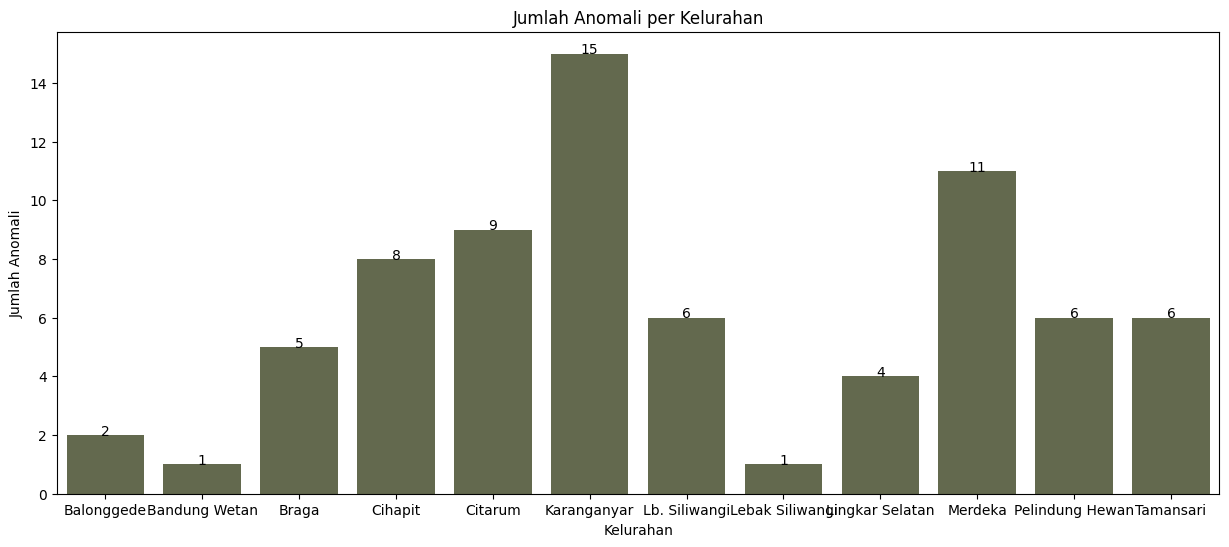

In [81]:
total_counts = dpkp3_dataset.groupby('Kelurahan').size().reset_index(name='total')
anomaly_counts = dpkp3_dataset[dpkp3_dataset['Anomali Status'] == 'Anomali'].groupby('Kelurahan').size().reset_index(name='anomaly_count')

anomaly_summary = total_counts.merge(anomaly_counts, on='Kelurahan', how='left')

plt.figure(figsize=(15, 6))
barplot = sns.barplot(x='Kelurahan', y='anomaly_count', data=anomaly_summary, color='#656D4A')
plt.title('Jumlah Anomali per Kelurahan')
plt.xlabel('Kelurahan')
plt.ylabel('Jumlah Anomali')
for index, row in anomaly_summary.iterrows():
    barplot.text(index, row['anomaly_count'], str(row['anomaly_count']), color='black', ha="center")
plt.show()